#  Import Libraries


In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


# Load Dataset


In [33]:
df = pd.read_csv('/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')

/tmp/ipykernel_55/2474584117.py:1: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')


# Explore Dataset

In [34]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.shape

(25974, 369)

# Data Cleaning

In [36]:
df=df.drop(0)

In [37]:
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=369)

In [38]:
for col in df.columns:
    if df[col].str.isnumeric().all():
        df[col] = pd.to_numeric(df[col])
        

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: float64(30), int64(1), object(338)
memory usage: 73.1+ MB


In [40]:
df['Q3'].unique()

array(['India', 'Indonesia', 'Pakistan', 'Mexico', 'Russia', 'Turkey',
       'Australia', 'Nigeria', 'Greece', 'Belgium', 'Japan', 'Egypt',
       'Singapore', 'Brazil', 'Poland', 'China',
       'Iran, Islamic Republic of...', 'United States of America',
       'Italy', 'Viet Nam', 'Israel', 'Peru', 'South Africa', 'Other',
       'Spain', 'Bangladesh',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Switzerland', 'Algeria', 'Tunisia', 'Argentina', 'Sweden',
       'Colombia', 'I do not wish to disclose my location', 'Canada',
       'Chile', 'Netherlands', 'Ukraine', 'Saudi Arabia', 'Romania',
       'Morocco', 'Austria', 'Taiwan', 'Kenya', 'Belarus', 'Ireland',
       'Portugal', 'Hong Kong (S.A.R.)', 'Denmark', 'Germany',
       'South Korea', 'Philippines', 'Sri Lanka', 'United Arab Emirates',
       'Uganda', 'Ghana', 'Malaysia', 'Thailand', 'Nepal', 'Kazakhstan',
       'Ethiopia', 'Iraq', 'Ecuador', 'Norway', 'Czech Republic'],
      dtype=obje

 # Filter Arab Countries

In [41]:
countries_str = "Algeria, Bahrain, Comoros, Djibouti, Egypt, Iraq, Jordan, Kuwait, Lebanon, Libya, Mauritania, Morocco, Oman, Palestine, Qatar, Saudi Arabia, Somalia, Sudan, Syria, Tunisia, United Arab Emirates, Yemen"

In [42]:
arab_countries = countries_str.split(", ")

In [43]:
df_arabs = df[df['Q3'].isin(arab_countries)]

In [44]:
df_arabs

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
20,650,30-34,Man,Egypt,Bachelor’s degree,Other,< 1 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,744,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,244,25-29,Woman,Egypt,Master’s degree,Currently not employed,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,453,18-21,Woman,Egypt,Bachelor’s degree,Student,1-3 years,Python,R,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,MLflow,NaN,NaN
85,161,25-29,Man,Algeria,Professional doctorate,Student,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,839,18-21,Man,United Arab Emirates,Bachelor’s degree,Student,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25807,733,22-24,Woman,Egypt,Master’s degree,Software Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25831,744,18-21,Woman,Egypt,Bachelor’s degree,Student,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25875,534,22-24,Man,Egypt,Some college/university study without earning ...,Student,3-5 years,Python,NaN,NaN,...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,NaN,NaN


In [45]:
df_arabs['Q3'].unique()

array(['Egypt', 'Algeria', 'Tunisia', 'Saudi Arabia', 'Morocco',
       'United Arab Emirates', 'Iraq'], dtype=object)

In [46]:
dis = df_arabs['Q1'].value_counts().sort_index()
dis


Q1
18-21    179
22-24    250
25-29    190
30-34    130
35-39    109
40-44     74
45-49     45
50-54     23
55-59      8
60-69     10
Name: count, dtype: int64

# Age Distribution

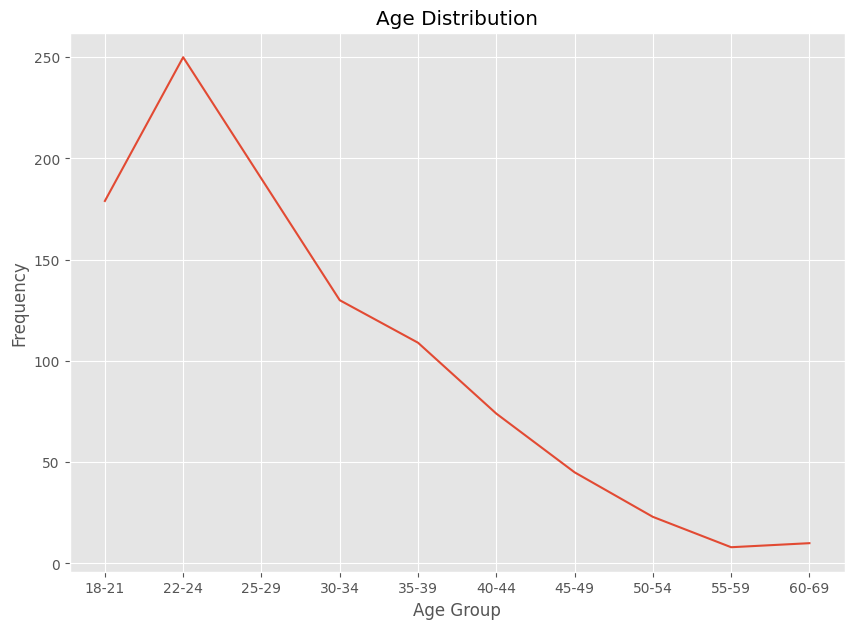

In [47]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7)) 
x = dis.index
y = dis.values
plt.title("Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Frequency")

plt.plot(x,y)
plt.show()

In [48]:
df_arabs

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
20,650,30-34,Man,Egypt,Bachelor’s degree,Other,< 1 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,744,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,244,25-29,Woman,Egypt,Master’s degree,Currently not employed,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,453,18-21,Woman,Egypt,Bachelor’s degree,Student,1-3 years,Python,R,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,MLflow,NaN,NaN
85,161,25-29,Man,Algeria,Professional doctorate,Student,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,839,18-21,Man,United Arab Emirates,Bachelor’s degree,Student,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25807,733,22-24,Woman,Egypt,Master’s degree,Software Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25831,744,18-21,Woman,Egypt,Bachelor’s degree,Student,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25875,534,22-24,Man,Egypt,Some college/university study without earning ...,Student,3-5 years,Python,NaN,NaN,...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,NaN,NaN


# Country Distribution

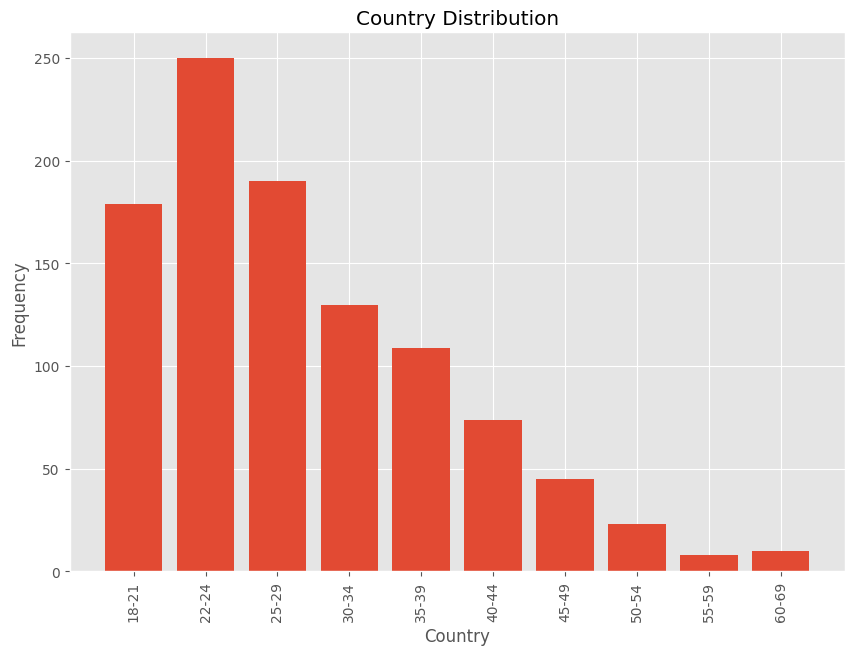

In [49]:
plt.figure(figsize=(10,7))
plt.title("Country Distribution")
plt.xlabel("Country")
plt.ylabel("Frequency")

x = dis.index
y = dis.values
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [50]:
 q7_columns = df_arabs.columns[df.columns.str.contains('Q7')]
q7_columns

Index(['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5',
       'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10',
       'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER'],
      dtype='object')

In [51]:
df_arabs[q7_columns]

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,Python,NaN,NaN,C,C++,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
25807,Python,R,SQL,C,C++,Java,Javascript,NaN,NaN,Bash,MATLAB,NaN,NaN
25831,Python,NaN,SQL,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25875,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Create a dictionary of the most frequent programming language in each Q7 column by counting values and storing the top one.


In [52]:
dic_7 = dict()

In [53]:
for col in q7_columns:
    counts = df[col].value_counts()

    if not counts.empty:
        key = counts.index[0]
        dic_7[key] = counts.iloc[0]

In [54]:
dic_7

{'Python': np.int64(21860),
 'R': np.int64(5334),
 'SQL': np.int64(10756),
 'C': np.int64(4709),
 'C++': np.int64(5535),
 'Java': np.int64(4769),
 'Javascript': np.int64(4332),
 'Julia': np.int64(305),
 'Swift': np.int64(242),
 'Bash': np.int64(2216),
 'MATLAB': np.int64(2935),
 'Other': np.int64(2575)}

In [55]:
q7_series = pd.Series(dic_7)

# Plot a pie chart of the programming languages in q7_series with labels and percentage values.


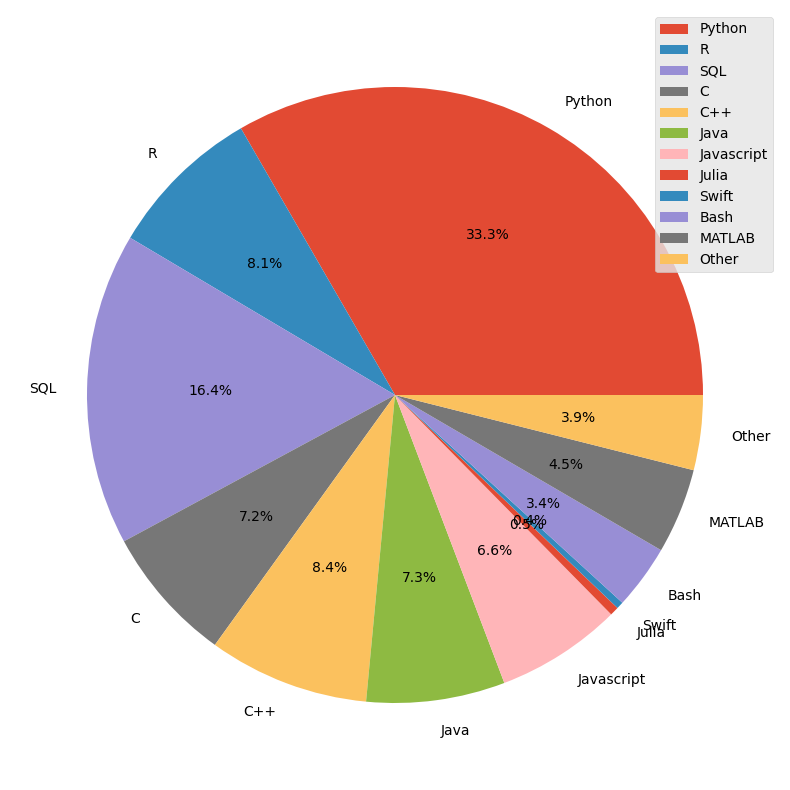

In [56]:
plt.figure(figsize=(10,10))
plt.pie(q7_series ,labels = q7_series.index  ,autopct="%1.1f%%")
plt.legend()
plt.show()

# Draw a pie chart of programming languages in q7_series with labels, percentages, and a legend.


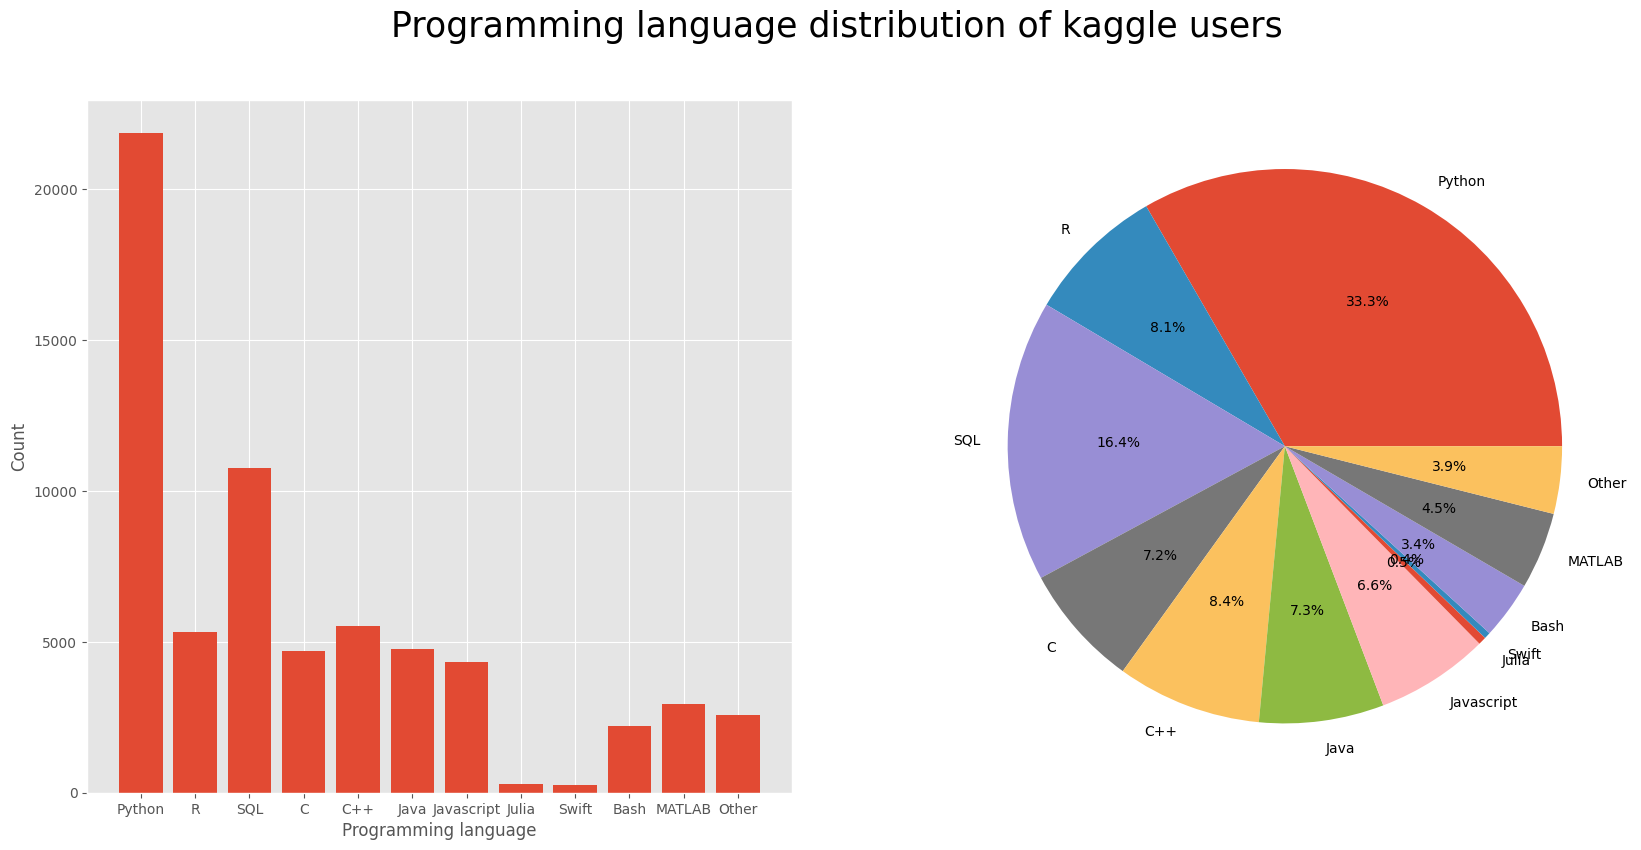

In [57]:
fig , axes = plt.subplots(1,2 , figsize=(20,9))
axes[0].bar(q7_series.index , q7_series.values )
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Programming language')


axes[1].pie(q7_series ,labels = q7_series.index  ,autopct="%1.1f%%")
plt.suptitle('Programming language distribution of kaggle users' ,fontsize = 25)

plt.show()
